In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Replace with your parquet file path
file_path = "RQ2_absolute.parquet"

# Load parquet file into pandas DataFrame
df = pd.read_parquet(file_path)
df.columns


Index(['data_id', 'target_unique_vals', 'NumberOfFeatures_post_processing',
       'pairwise_complexity_post_processing', 'base_fit_time',
       'base_score_time', 'base_test_f1_macro', 'base_train_f1_macro',
       'base_test_neg_log_loss', 'base_train_neg_log_loss',
       'base_test_neg_brier_score', 'base_train_neg_brier_score',
       'base_n_jobs_cv', 'base_cpu', 'base_ram', 'base_test_f1', 'base_time',
       'pdc_fit_time', 'pdc_score_time', 'pdc_test_f1_macro',
       'pdc_train_f1_macro', 'pdc_test_neg_log_loss', 'pdc_train_neg_log_loss',
       'pdc_test_neg_brier_score', 'pdc_train_neg_brier_score',
       'pdc_n_jobs_cv', 'pdc_cpu', 'pdc_ram', 'pdc_test_f1', 'pdc_time',
       'pdc_ram_max', 'data_time', 'name', 'version', 'uploader', 'status',
       'format', 'MajorityClassSize', 'MaxNominalAttDistinctValues',
       'MinorityClassSize', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues

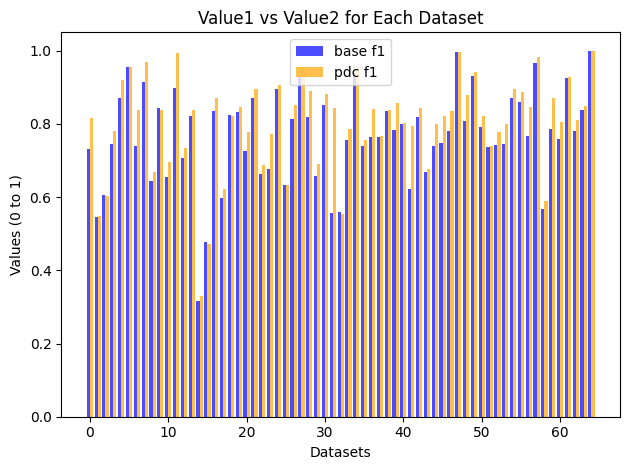

In [ ]:
df_third = df[:65]
x = np.arange(len(df_third))  # one position per datapoint
width = 0.4  # width of each bar

# Plot bars side by side
plt.bar(x - width/2, df_third["base_test_f1"], width=width, color="blue", alpha=0.7, label="No PDC F1")
plt.bar(x + width/2, df_third["pdc_test_f1"], width=width, color="orange", alpha=0.7, label="PDC F1")

# Formatting
plt.xlabel("Dataset id")
plt.ylabel("F1 Value")
plt.title("No PDC vs Current F1 per Dataset")
plt.legend()

plt.tight_layout()
plt.show()


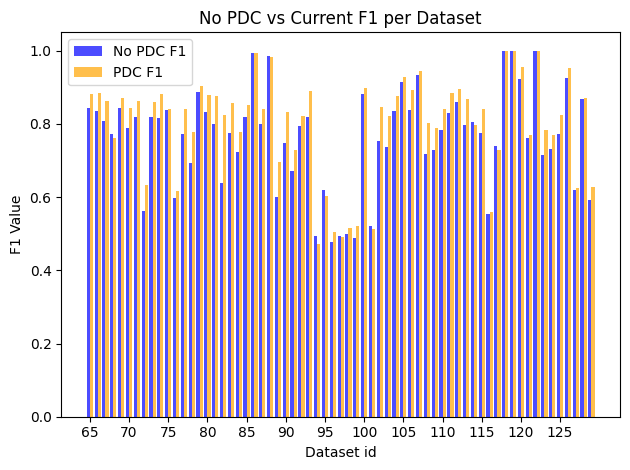

In [ ]:
df_third = df[65:130]
x = np.arange(len(df_third))  # one position per datapoint
width = 0.4  # width of each bar

# Plot bars side by side
plt.bar(x - width/2, df_third["base_test_f1"], width=width, color="blue", alpha=0.7, label="No PDC F1")
plt.bar(x + width/2, df_third["pdc_test_f1"], width=width, color="orange", alpha=0.7, label="PDC F1")

# Formatting
plt.xlabel("Dataset id")
plt.ylabel("F1 Value")
plt.title("No PDC vs Current F1 per Dataset")
plt.xticks(range(0,65,5), range(65,130,5))
plt.legend()

plt.tight_layout()
plt.show()

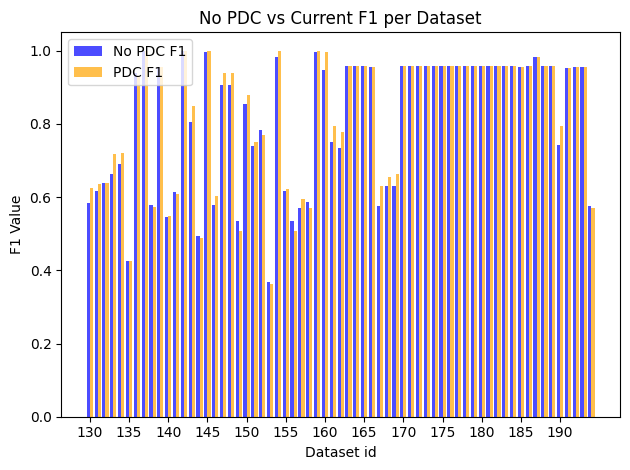

In [53]:
df_third = df[130:]
x = np.arange(len(df_third))  # one position per datapoint
width = 0.4  # width of each bar

# Plot bars side by side
plt.bar(x - width/2, df_third["base_test_f1"], width=width, color="blue", alpha=0.7, label="No PDC F1")
plt.bar(x + width/2, df_third["pdc_test_f1"], width=width, color="orange", alpha=0.7, label="PDC F1")

# Formatting
plt.xlabel("Dataset id")
plt.ylabel("F1 Value")
plt.title("No PDC vs Current F1 per Dataset")
plt.xticks(range(0,65,5), range(130,195,5))
plt.legend()

plt.tight_layout()
plt.show()

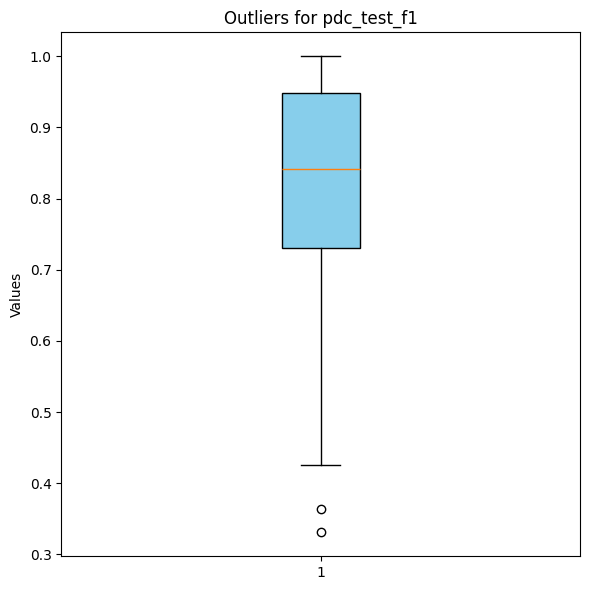

0.8100642078858202
0.8414435572748574


In [17]:
column = "pdc_test_f1"
data = df[column].dropna()  # drop NaN just in case

# Create boxplot for that column
plt.figure(figsize=(6, 6))
plt.boxplot(data, vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))

# Formatting
plt.title(f"Outliers for {column}")
plt.ylabel("Values")

plt.tight_layout()
plt.show()

print(df["pdc_test_f1"].mean())
print(df["pdc_test_f1"].median())

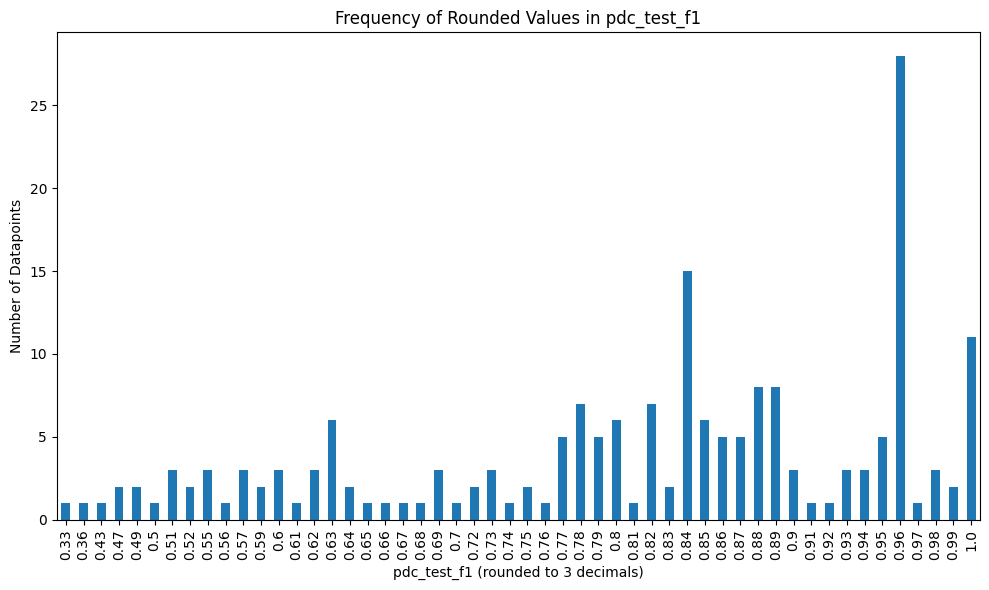

In [ ]:
# Choose the column to analyze
column = "pdc_test_f1"

# Round values to 3 decimal places
rounded = df[column].round(2)

# Count frequencies
counts = rounded.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
counts.plot(kind="bar")

# Formatting
plt.title(f"Frequency of F1 scores")
plt.xlabel(f"{column} (rounded to 3 decimals)")
plt.ylabel("Number of Datapoints")
plt.xticks(rotation=90, ha="center")

plt.tight_layout()
plt.show()

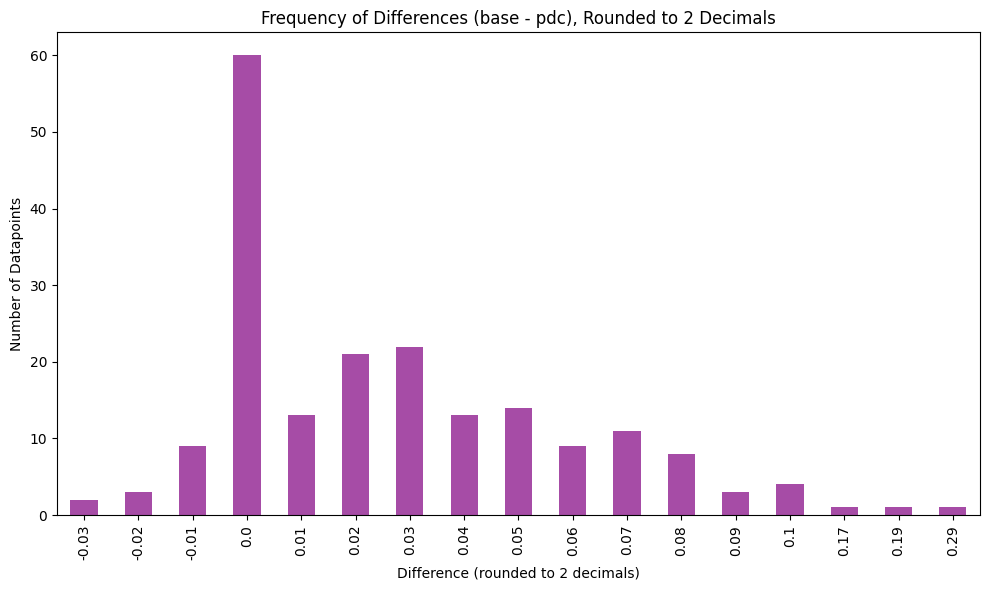

In [54]:
diff = (df["pdc_test_f1"] - df["base_test_f1"]).round(2)

# Count frequencies of the differences
counts = diff.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
counts.plot(kind="bar", color="purple", alpha=0.7)

# Formatting
plt.title(f"Frequency of Differences (base - pdc), Rounded to 2 Decimals")
plt.xlabel("Difference (rounded to 2 decimals)")
plt.ylabel("Number of Datapoints")
plt.xticks(rotation=90, ha="center")

plt.tight_layout()
plt.show()

In [46]:
df["diff"] = (df["pdc_test_f1"] - df["base_test_f1"]).round(2)

# Remove negative values
diff_filtered = df["diff"][diff < 0]
diff_0 = df['diff'][diff == 0]

# Get the top 20 highest values
top20 = df["diff"].nlargest(20)

print(top20)
print(len(diff_filtered))
print(1400/195)
print(diff_filtered)
print("diff 0")
print(len(diff_0))

173    0.29
19     0.19
15     0.17
22     0.10
93     0.10
123    0.10
174    0.10
95     0.09
5      0.09
183    0.09
112    0.08
117    0.08
188    0.08
12     0.08
124    0.08
120    0.08
187    0.08
121    0.08
119    0.07
191    0.07
Name: diff, dtype: float64
14
7.17948717948718
6     -0.01
153   -0.02
40    -0.02
140   -0.01
89    -0.01
73    -0.01
74    -0.01
141   -0.01
86    -0.01
164   -0.03
138   -0.01
165   -0.03
150   -0.02
72    -0.01
Name: diff, dtype: float64
diff 0
60


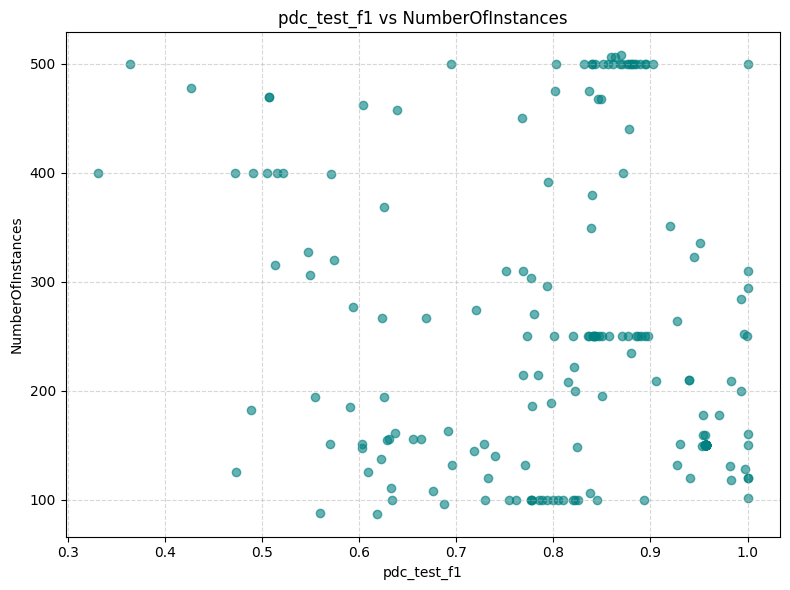

In [38]:
# Pick two columns for the chart
x_col = "pdc_test_f1"
y_col = "NumberOfInstances"

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_col], df[y_col], alpha=0.6, color="teal")

# Formatting
plt.title(f"{x_col} vs {y_col}")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

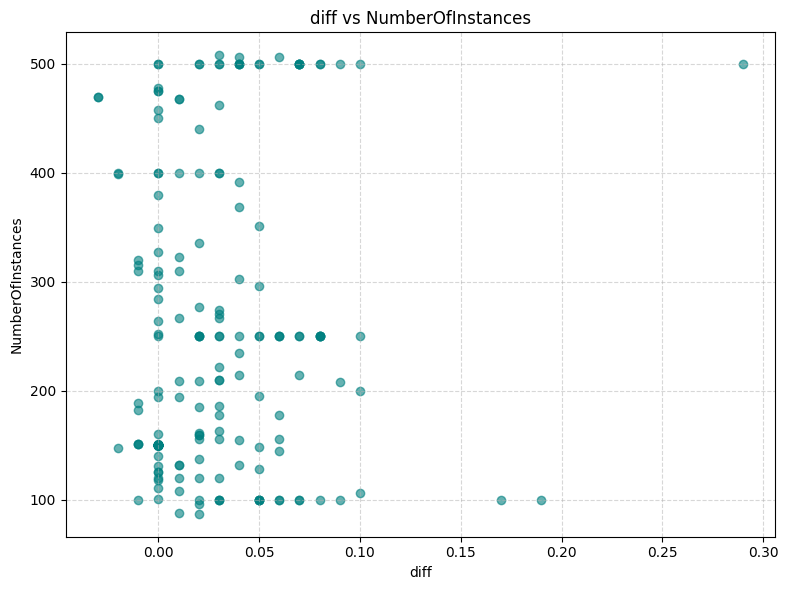

In [41]:
# Pick two columns for the chart
x_col = "diff"
y_col = "NumberOfInstances"

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df[x_col], df[y_col], alpha=0.6, color="teal")

# Formatting
plt.title(f"{x_col} vs {y_col}")
plt.xlabel(x_col)
plt.ylabel(y_col)
plt.grid(True, linestyle="--", alpha=0.5)

plt.tight_layout()
plt.show()

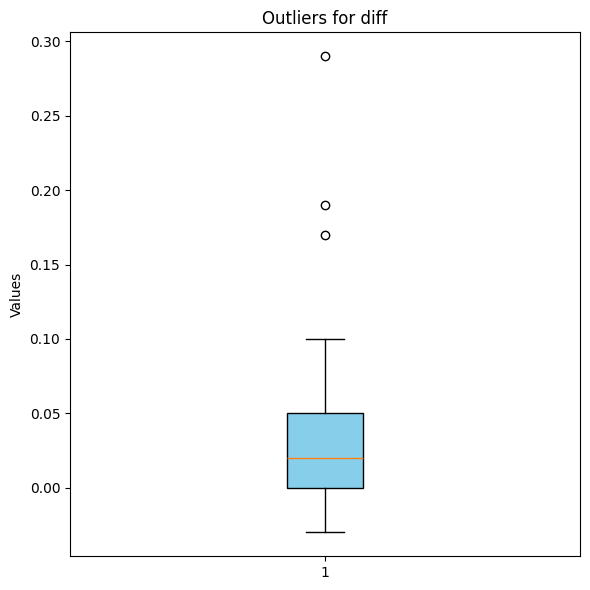

0.028153846153846154
0.02


In [48]:
column = "diff"
data = df[column].dropna()  # drop NaN just in case

# Create boxplot for that column
plt.figure(figsize=(6, 6))
plt.boxplot(data, vert=True, patch_artist=True, boxprops=dict(facecolor="skyblue"))

# Formatting
plt.title(f"Outliers for {column}")
plt.ylabel("Values")

plt.tight_layout()
plt.show()

print(df["diff"].mean())
print(df["diff"].median())